# Visualisations for Lateguru Presentation

### Importing Libraries

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('../raw_data/All_Airports.csv', compression='zip')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Origin                  object 
 2   Dest                    object 
 3   Carrier                 object 
 4   Cancelled               bool   
 5   CancellationReason      object 
 6   Delayed                 bool   
 7   DepDelayMinutes         float64
 8   CarrierDelay            float64
 9   WeatherDelay            float64
 10  NASDelay                float64
 11  SecurityDelay           float64
 12  LateAircraftDelay       float64
 13  Temperature             float64
 14  Feels_Like_Temperature  float64
 15  Altimeter_Pressure      float64
 16  Sea_Level_Pressure      float64
 17  Visibility              float64
 18  Wind_Speed              float64
 19  Wind_Gust               float64
 20  Precipitation           float64
 21  Ice_Accretion_3hr       float

In [4]:
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1020.32,1020.1,16093.40,0.0,24.97,0.0,0.0
1,2021-01-02 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,2.0,NaN,NaN,...,NaN,54.0,54.0,1025.74,1025.5,16093.40,0.0,24.97,0.0,0.0
2,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.6,24.97,0.0,0.0
3,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.6,24.97,0.0,0.0
4,2021-01-04 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.1,1023.03,1015.2,6437.36,4.6,24.97,0.0,0.0


### Percentage of Delays & Delay Reasons

Delayed
False    0.61072
True     0.38928
Name: proportion, dtype: float64


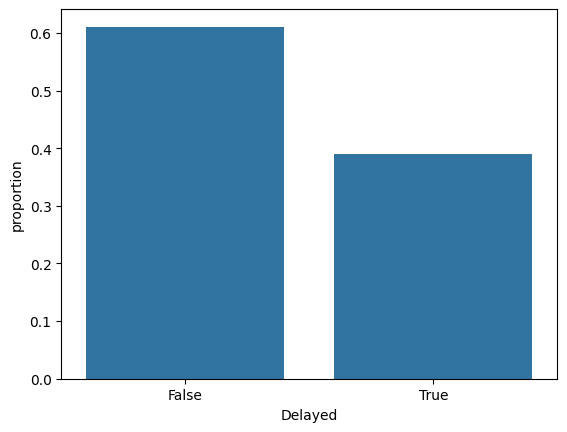

In [15]:
pct_delayed_flights = df['Delayed'].value_counts(normalize=True)

print(pct_delayed_flights)

sns.barplot(pct_delayed_flights)

plt.show()

In [7]:
#filling Delay type fields with 0s instead of NaNs
df[['WeatherDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay']] = df[['WeatherDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay']].fillna(0.0)

In [70]:
#feature engineering boolean delay type cols
df['weather_delayed'] = df['WeatherDelay'].apply(lambda x: 1 if x > 0 else 0)
df['carrier_delayed'] = df['CarrierDelay'].apply(lambda x: 1 if x > 0 else 0)
df['lateaircraft_delayed'] = df['LateAircraftDelay'].apply(lambda x: 1 if x > 0 else 0)
df['nas_delayed'] = df['NASDelay'].apply(lambda x: 1 if x > 0 else 0)
df['security_delayed'] = df['SecurityDelay'].apply(lambda x: 1 if x > 0 else 0)
df['carrier_nas_delayed'] = df.apply(lambda row: 1 if row['carrier_delayed'] == 1 and row['nas_delayed'] == 1 else 0, axis = 1)
df['carrier_only_delayed'] = df.apply(lambda row: 1 if row['carrier_delayed'] == 1 and row['nas_delayed'] == 0 else 0, axis = 1)
df['nas_only_delayed'] = df.apply(lambda row: 1 if row['carrier_delayed'] == 0 and row['nas_delayed'] == 1 else 0, axis = 1)


In [71]:
df[['weather_delayed', 'carrier_only_delayed', 'lateaircraft_delayed', 'nas_only_delayed', 'security_delayed', 'carrier_nas_delayed']].head()

,weather_delayed,carrier_only_delayed,lateaircraft_delayed,nas_only_delayed,security_delayed,carrier_nas_delayed
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [73]:
df[['weather_delayed', 'carrier_only_delayed', 'carrier_nas_delayed', 'lateaircraft_delayed', 'nas_only_delayed', 'security_delayed']][df['nas_delayed'] == 1].head(50)

,weather_delayed,carrier_only_delayed,carrier_nas_delayed,lateaircraft_delayed,nas_only_delayed,security_delayed
2,0,0,1,0,0,0
3,0,0,1,0,0,0
54,0,0,1,0,0,0
112,0,0,1,0,0,0
113,0,0,1,0,0,0
133,0,0,1,0,0,0
153,0,0,1,0,0,0
177,0,0,1,0,0,0
178,0,0,0,0,1,0
181,0,0,1,0,0,0


In [28]:
#breaking down the total reasons for flight delays across the entire dataset
num_delayed_flights = df['Delayed'][df['Delayed'] == True].count()
num_weather_delayed_flights = df['weather_delayed'].sum()
num_carrier_delayed_flights = df['carrier_delayed'].sum()
num_lateaircraft_delayed_flights = df['lateaircraft_delayed'].sum()
num_security_delayed_flights = df['security_delayed'].sum()

print(f"There were {num_delayed_flights} delayed flights in total")
print(f"There were {num_weather_delayed_flights} delayed flights due to bad weather in total")
print(f"There were {num_carrier_delayed_flights} carrier delayed flights in total")
print(f"There were {num_lateaircraft_delayed_flights} delayed flights due to late arriving aircraft in total")
print(f"There were {num_security_delayed_flights} delayed flights due to a security issues in total")


There were 5895451 delayed flights in total
There were 275047 delayed flights due to bad weather in total
There were 1925686 carrier delayed flights in total
There were 1491713 delayed flights due to late arriving aircraft in total
There were 17888 delayed flights due to a security issues in total


<Axes: >

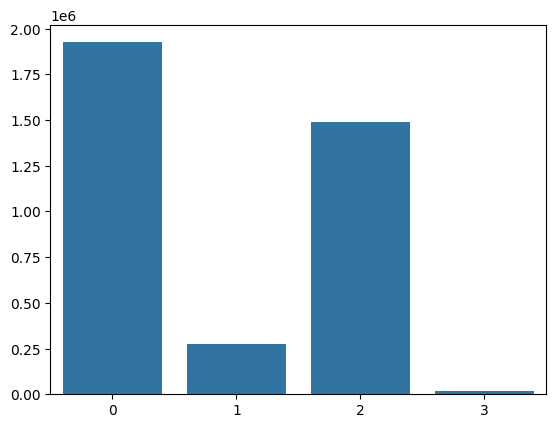

In [32]:
sns.barplot([num_carrier_delayed_flights, num_weather_delayed_flights, num_lateaircraft_delayed_flights, num_security_delayed_flights])

In [75]:
df_delayed = df[df['Delayed'] == True]

In [59]:
df_delayed[['Delayed', 'weather_delayed', 'carrier_delayed', 'lateaircraft_delayed', 'security_delayed', 'nas_delayed']].groupby(['Delayed']).sum()

,weather_delayed,carrier_delayed,lateaircraft_delayed,security_delayed,nas_delayed
Delayed,,,,,
True,274976,1884091,1491701,17881,1247924


In [76]:
pct_delay_type = df_delayed[['Delayed', 'weather_delayed', 'carrier_nas_delayed', 'carrier_only_delayed', 'lateaircraft_delayed', 'nas_only_delayed']].groupby(['Delayed']).sum() / num_delayed_flights

pct_delay_type

,weather_delayed,carrier_nas_delayed,carrier_only_delayed,lateaircraft_delayed,nas_only_delayed
Delayed,,,,,
True,0.046642,0.121766,0.197818,0.253026,0.08991


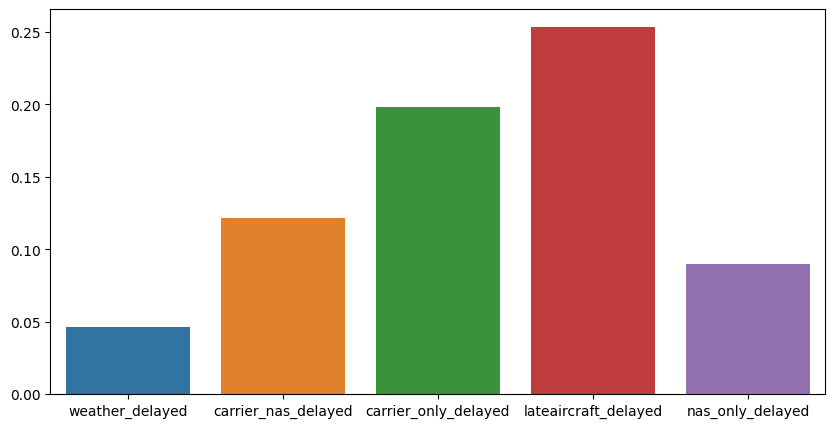

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(pct_delay_type)
plt.show()

In [79]:
pct_delay_type_not_mutually_exclusive = df_delayed[['Delayed', 'weather_delayed', 'carrier_delayed', 'lateaircraft_delayed', 'nas_delayed']].groupby(['Delayed']).sum() / num_delayed_flights

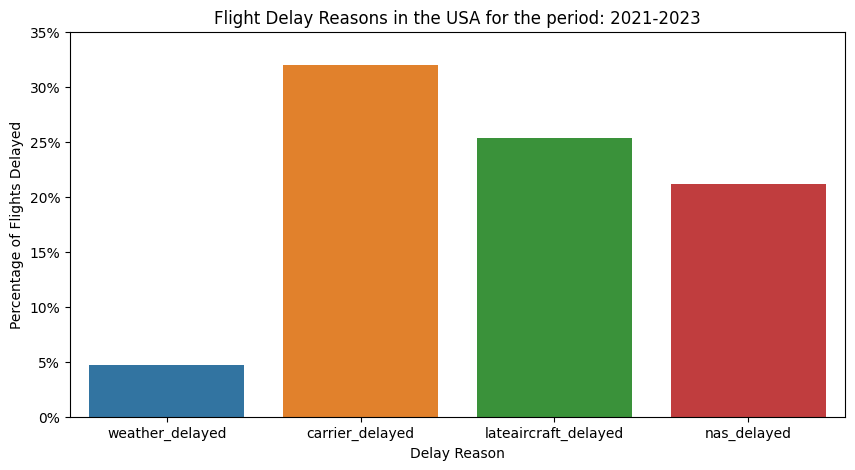

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(pct_delay_type_not_mutually_exclusive)
plt.title("Flight Delay Reasons in the USA for the period: 2021-2023")
plt.ylabel('Percentage of Flights Delayed')
plt.xlabel('Delay Reason')
plt.yticks(plt.yticks()[0], ['{:.0f}%'.format(x * 100) for x in plt.yticks()[0]])
plt.show()